# Extract EEG signals from a dataset for seizure detection


# Import Libraries


In [1]:
import numpy as np
import os
import pandas
import matplotlib
import matplotlib.pyplot as plt

import mne
from mne.filter import notch_filter


C:\Users\loicl\AppData\Local\Temp\ipykernel_32880\1914745164.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


# Locate Data

https://mne.tools/stable/auto_tutorials/intro/10_overview.html#sphx-glr-auto-tutorials-intro-10-overview-py


In [2]:
# Set data location
DEV_DATA_FOLDER = "E:/edf/dev"


# Set absence file names
ABSENCE_FILES_NAMES = []
with open(r"processed_data\absence\absence_files.txt", "r") as f:
    for i in f.readlines():
        ABSENCE_FILES_NAMES.append(DEV_DATA_FOLDER + i[:-1])


In [3]:
raw = mne.io.read_raw_edf(ABSENCE_FILES_NAMES[0])


Extracting EDF parameters from E:\edf\dev\02_tcp_le\033\00003306\s001_2006_10_11\00003306_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


## Load Data


In [4]:
raw.load_data()


Reading 0 ... 356499  =      0.000 ...  1425.996 secs...


Measurement date,"October 11, 2006 14:54:02 GMT"
Experimenter,Unknown
Participant,00003306
Digitized points,Not available
Good channels,41 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


Using matplotlib as 2D backend.


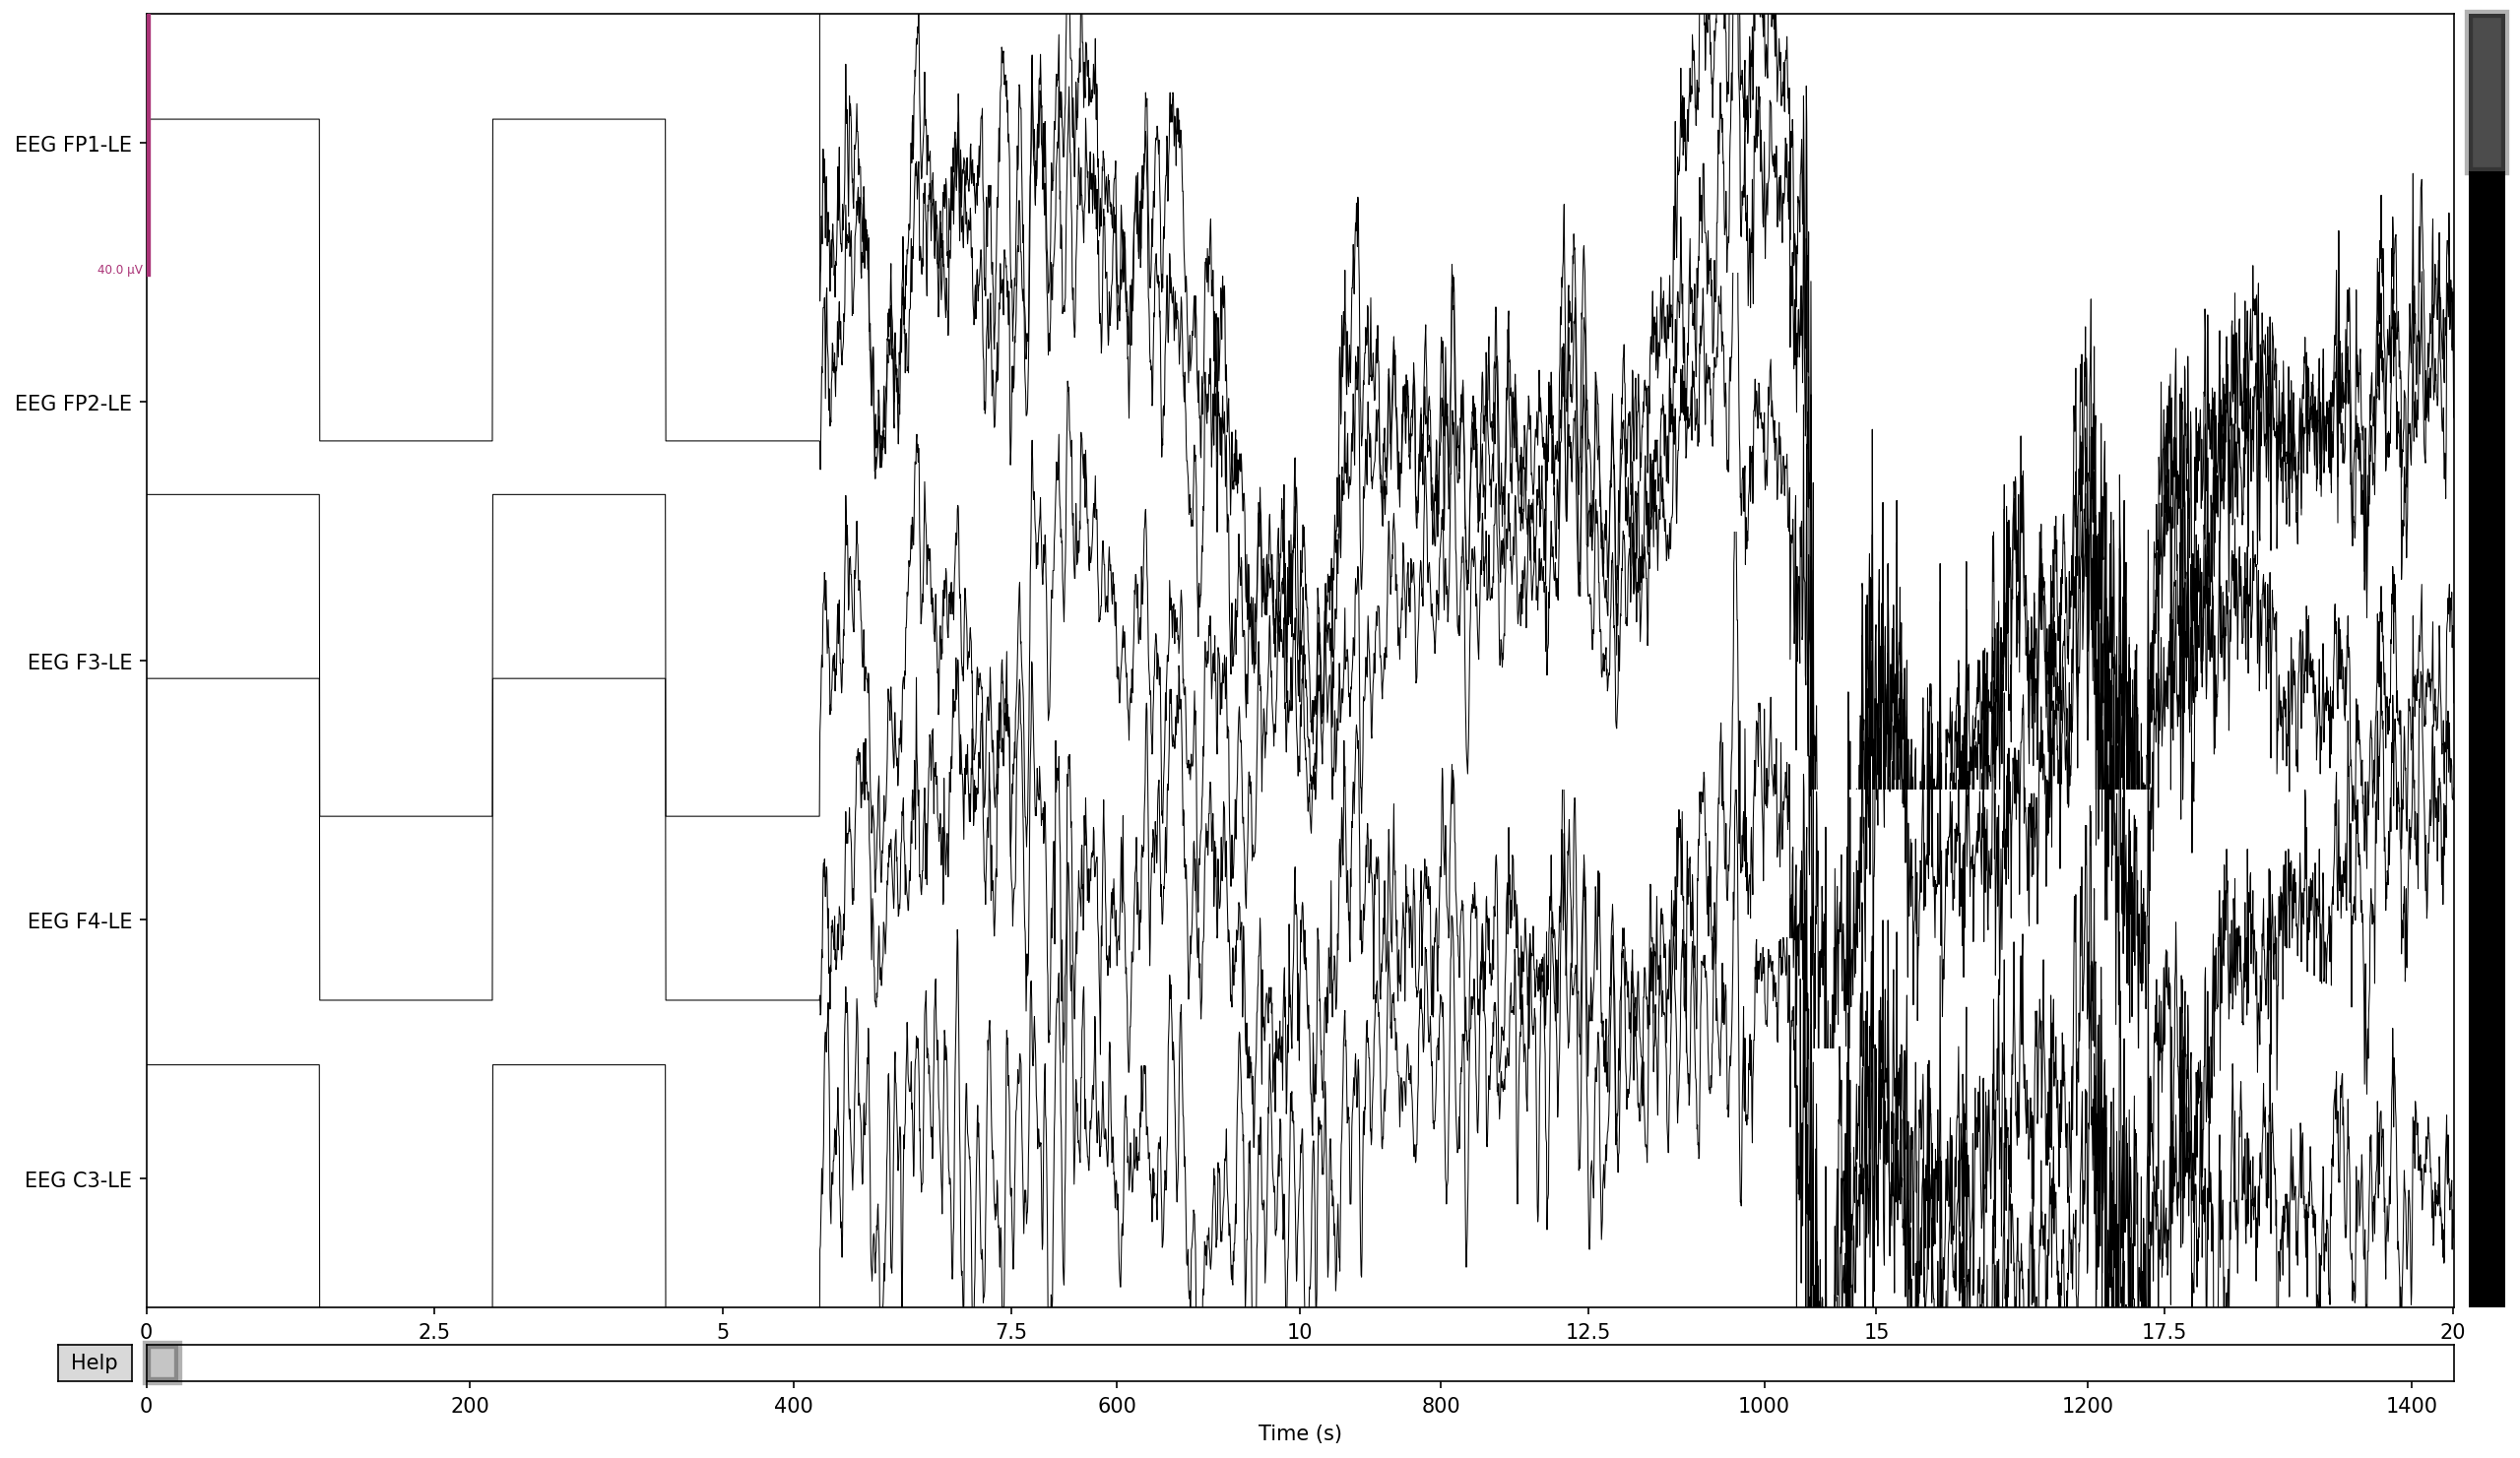

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none


In [ ]:
%matplotlib qt
raw.plot(duration=20, n_channels=5)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)



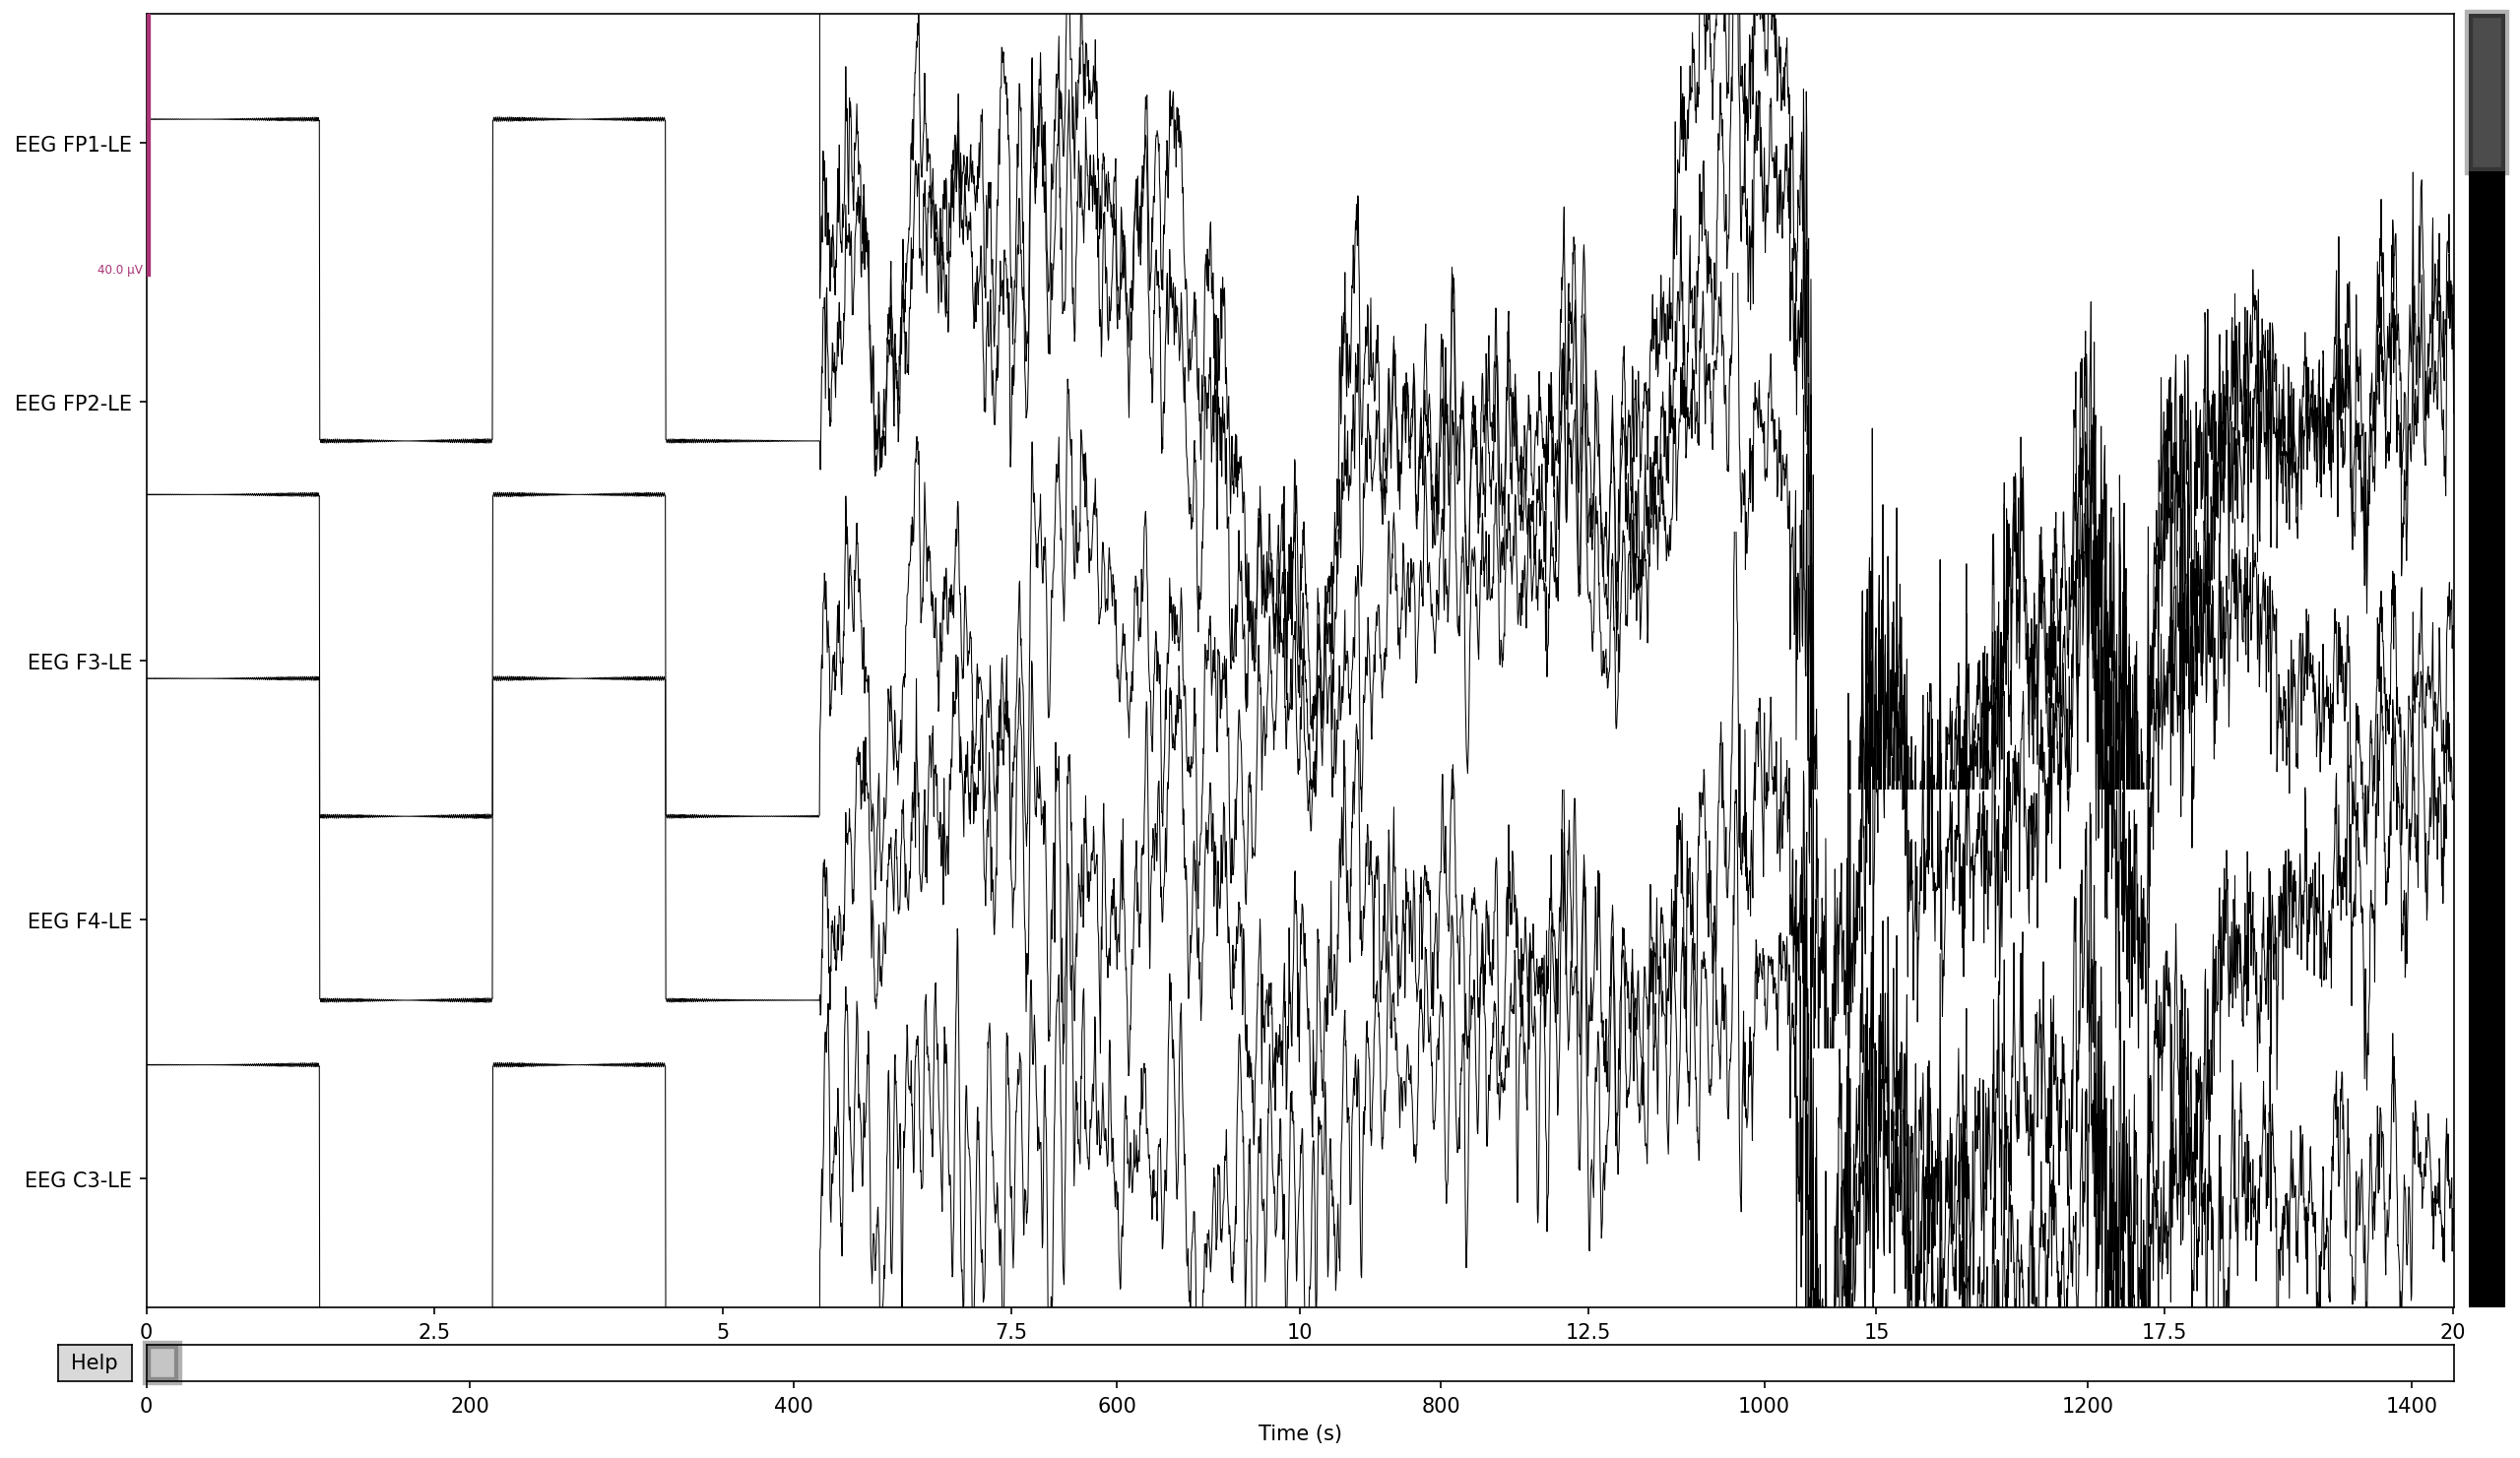

In [9]:
data = raw.get_data()
info = raw.info
frequency = raw.info["sfreq"]

raw.notch_filter(60)

raw.plot(duration=20, n_channels=5)

# Next -
# Plan window
# Find out which channels are for ABSZ,
#   Extract and use only those channels


Not setting metadata
1425 matching events found


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1425 events and 500 original time points ...
0 bad epochs dropped


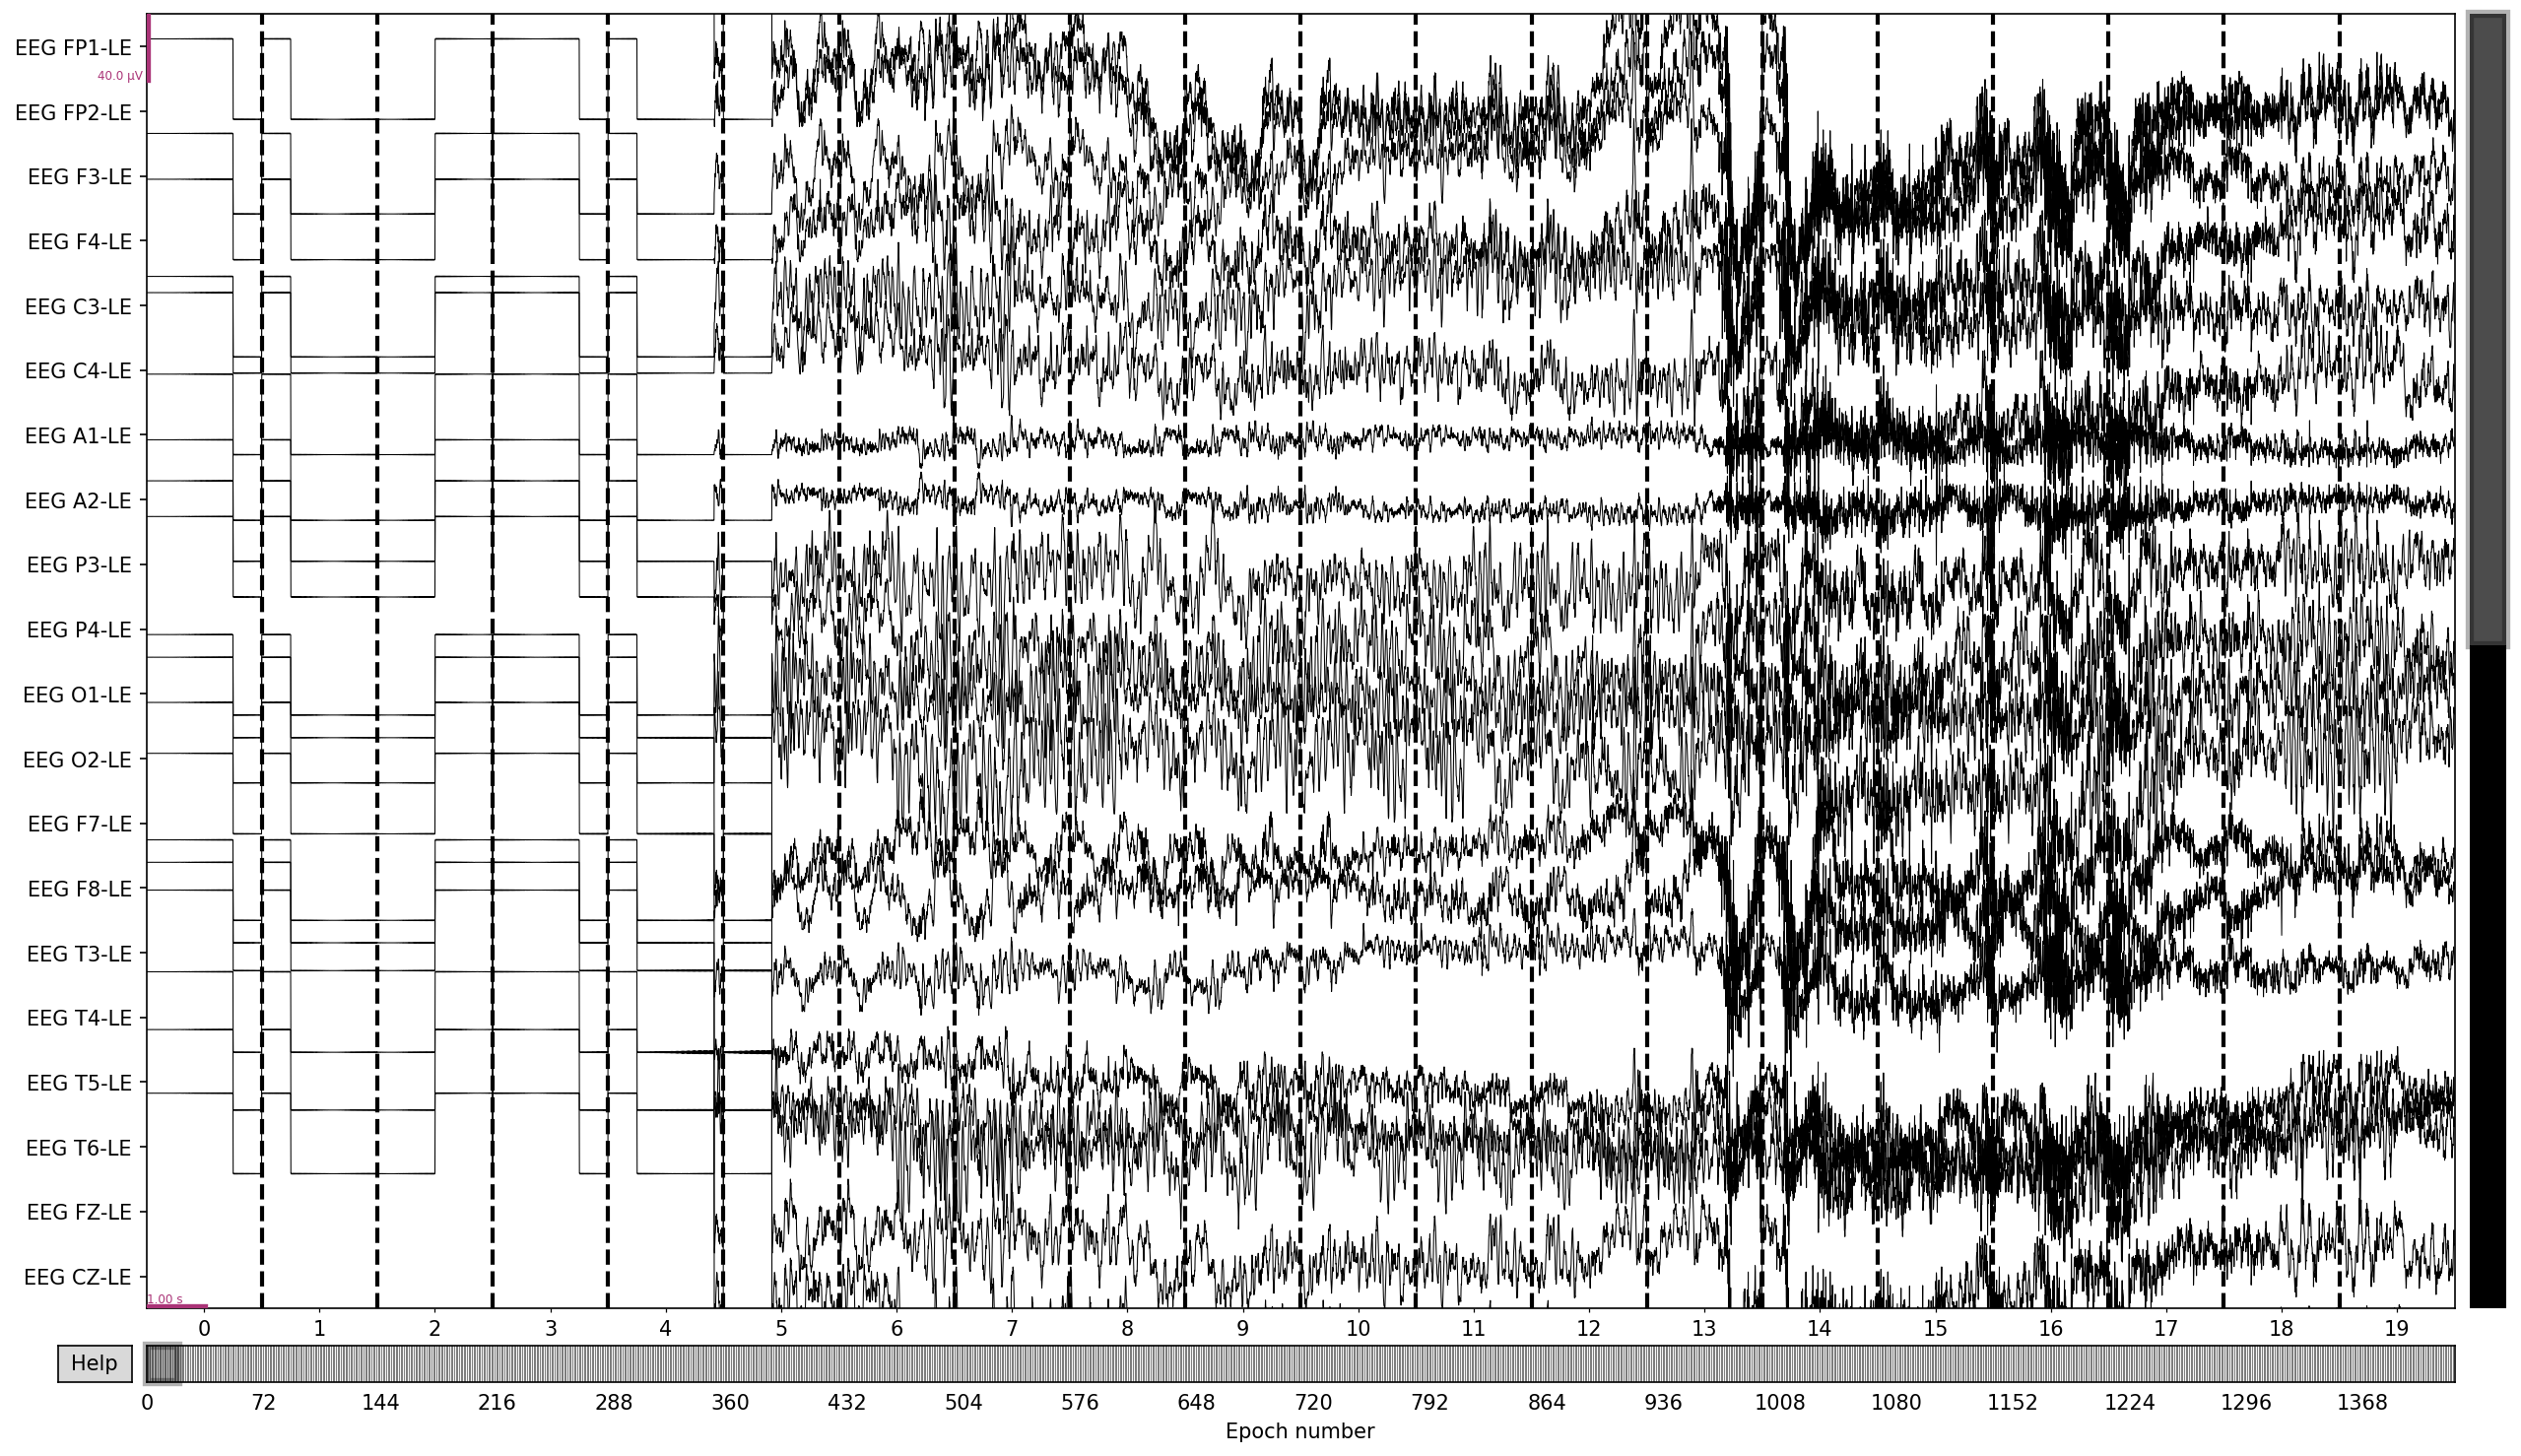

In [7]:
epochs = mne.make_fixed_length_epochs(raw, duration=2, overlap=1, preload=True)
epochs.plot(n_epochs=20)


In [8]:
print(epochs.get_data(start=0, stop=4))


[[[ 2.48718390e-05  2.48356760e-05  2.48677572e-05 ... -2.47643223e-05
   -2.47973320e-05 -2.49696015e-05]
  [ 2.48718390e-05  2.48356760e-05  2.48677572e-05 ... -2.47643223e-05
   -2.47973320e-05 -2.49696015e-05]
  [ 2.48718390e-05  2.48356760e-05  2.48677572e-05 ... -2.47643223e-05
   -2.47973320e-05 -2.49696015e-05]
  ...
  [ 2.13623157e-03  2.46416026e-03  2.29351161e-02 ...  9.61362344e-01
    9.61579674e-01  9.61646907e-01]
  [-3.05175939e-04  4.35313736e-04  4.12980682e-02 ...  9.66480283e-01
    9.66545535e-01  9.66610344e-01]
  [-3.05175939e-04  8.60429541e-04  6.33252682e-02 ...  9.66466178e-01
    9.66531473e-01  9.66622189e-01]]

 [[ 2.47452720e-05  2.49973617e-05  2.50130798e-05 ... -2.51010934e-05
   -2.50264579e-05 -2.46587041e-05]
  [ 2.47452720e-05  2.49973617e-05  2.50130798e-05 ... -2.51059037e-05
   -2.50352099e-05 -2.46615601e-05]
  [ 2.47452720e-05  2.49973617e-05  2.50130798e-05 ... -2.51055158e-05
   -2.50368388e-05 -2.46615525e-05]
  ...
  [ 9.61648421e-01  9.6

C:\Users\loicl\AppData\Local\Temp\ipykernel_32880\442719943.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(epochs.get_data())
